In [389]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [390]:
train_features = pd.read_csv("training_set_features.csv")
train_labels = pd.read_csv("training_set_labels.csv")
test_features = pd.read_csv("test_set_features.csv")
submission_format = pd.read_csv("submission_format.csv")

In [391]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

<Axes: >

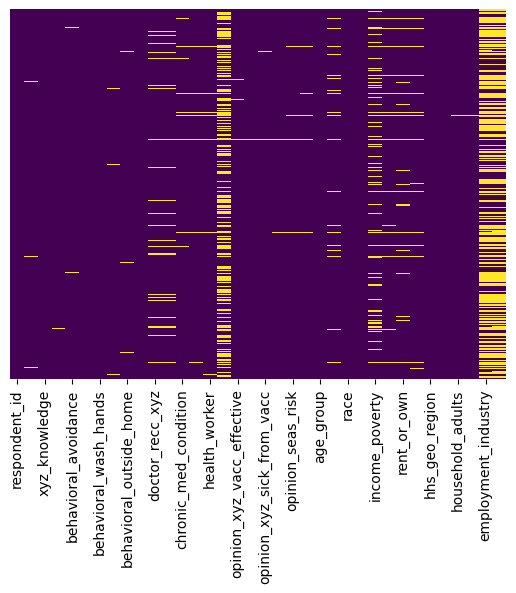

In [392]:
sns.heatmap(train_features.isnull(),yticklabels=False ,cbar= False,cmap= 'viridis')

In [393]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [394]:
#health_insurance, doctor_recc_xyz, doctor_recc_seasonal, rent_or_own,income_poverty, employment_industry, employment_occupation,education, marital_status

In [395]:
train_features['health_insurance']

0        1.0
1        1.0
2        NaN
3        NaN
4        NaN
        ... 
26702    NaN
26703    1.0
26704    NaN
26705    0.0
26706    1.0
Name: health_insurance, Length: 26707, dtype: float64

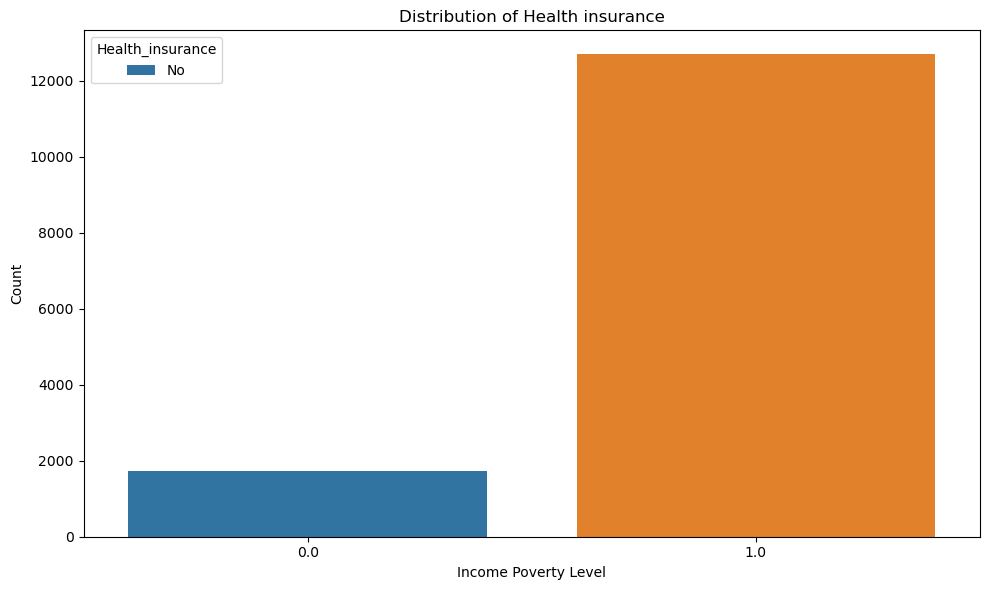

In [396]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_features, x='health_insurance')
plt.title('Distribution of Health insurance')
plt.xlabel('Income Poverty Level')
plt.ylabel('Count')
plt.legend(title='Health_insurance', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [397]:
train_features['health_insurance'] = train_features['health_insurance'].fillna(train_features['health_insurance'].mode()[0])

In [398]:
train_features['health_insurance'].count()

26707

In [399]:
train_features['doctor_recc_xyz'].isnull().sum()

2160

In [400]:
train_features['doctor_recc_seasonal'].isnull().sum()

2160

In [401]:
#in doctor_recc_xyz and doctor_recc_seasonal, missing value may represent no vaccine was recommended. so replace by 0.
train_features['doctor_recc_xyz'] = train_features['doctor_recc_xyz'].fillna(0.0)
train_features['doctor_recc_seasonal'] = train_features['doctor_recc_seasonal'].fillna(0.0)

In [402]:
train_features['employment_industry'].value_counts()

employment_industry
fcxhlnwr    2468
wxleyezf    1804
ldnlellj    1231
pxcmvdjn    1037
atmlpfrs     926
arjwrbjb     871
xicduogh     851
mfikgejo     614
vjjrobsf     527
rucpziij     523
xqicxuve     511
saaquncn     338
cfqqtusy     325
nduyfdeo     286
mcubkhph     275
wlfvacwt     215
dotnnunm     201
haxffmxo     148
msuufmds     124
phxvnwax      89
qnlwzans      13
Name: count, dtype: int64

In [403]:
train_features['employment_industry'].fillna('Unknown', inplace=True)
train_features['employment_occupation'].fillna('Unknown', inplace=True)

In [404]:
train_features['education'].value_counts()

education
College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: count, dtype: int64

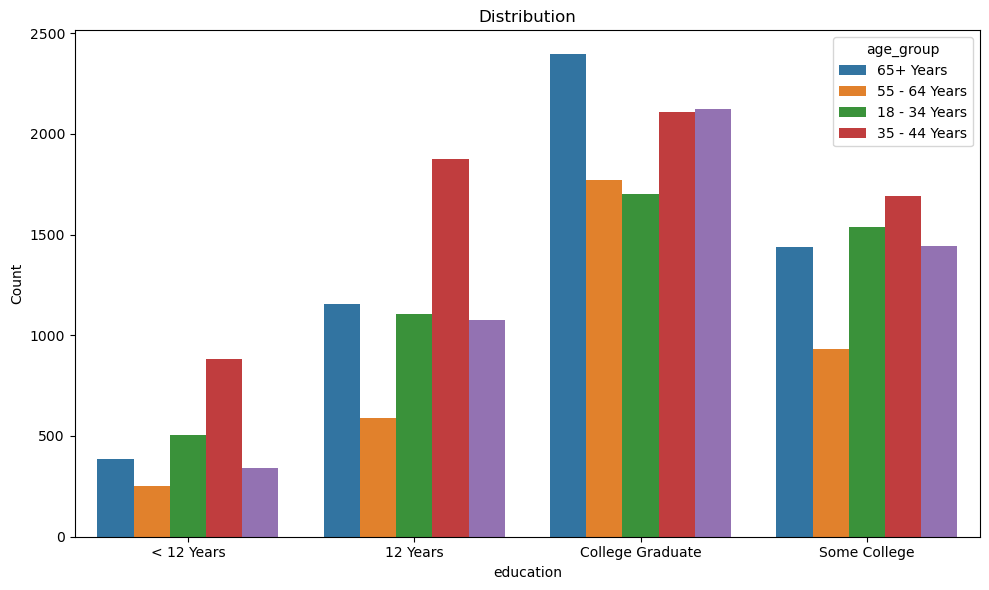

In [405]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_features, x='education',hue='age_group')
plt.title('Distribution')
plt.xlabel('education')
plt.ylabel('Count')
plt.legend(title='age_group', labels=['65+ Years', '55 - 64 Years','18 - 34 Years','35 - 44 Years'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [406]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [407]:
train_features['xyz_concern']

0        1.0
1        3.0
2        1.0
3        1.0
4        2.0
        ... 
26702    2.0
26703    1.0
26704    2.0
26705    1.0
26706    0.0
Name: xyz_concern, Length: 26707, dtype: float64

In [408]:
data = train_features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [409]:
#median_fill_columns = ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands','behavioral_large_gatherings', 'behavioral_outside_home','chronic_med_condition', 'child_under_6_months','health_worker','behavioral_touch_face']
#for col in median_fill_columns:
    #data[col]= data[col].fillna(data[col].median())
    



In [410]:
#median_fill_columns = ['xyz_concern', 'xyz_knowledge','household_adults','household_children']
#for col in median_fill_columns:
     #data[col] = data[col].fillna(data[col].median())
        
#data['rent_or_own'] = data['rent_or_own'].fillna('Own')
#data['income_poverty'] = data['income_poverty'].fillna('<= $75,000, Above Poverty')

In [411]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [412]:
data['income_poverty'].value_counts()

income_poverty
<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: count, dtype: int64

In [413]:
data['rent_or_own'].value_counts()

rent_or_own
Own     18736
Rent     5929
Name: count, dtype: int64

In [414]:
data['marital_status'].value_counts()

marital_status
Married        13555
Not Married    11744
Name: count, dtype: int64

In [415]:
data['education'].value_counts()

education
College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: count, dtype: int64

In [416]:
#data_new = data.dropna()

In [417]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [418]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()

In [419]:
df_encoded = data.copy()
df_encoded[data.select_dtypes(include=['object']).columns] = ord_enc.fit_transform(data[data.select_dtypes(include=['object']).columns].fillna('missing'))


In [420]:
df_encoded['age_group'].value_counts()

age_group
4.0    6843
3.0    5563
2.0    5238
0.0    5215
1.0    3848
Name: count, dtype: int64

In [421]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
features_to_impute = ['income_poverty','rent_or_own','employment_status','xyz_concern', 'xyz_knowledge','household_adults','household_children','behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands','behavioral_large_gatherings', 'behavioral_outside_home','chronic_med_condition', 'child_under_6_months','health_worker','behavioral_touch_face']
imputed_values = imputer.fit_transform(df_encoded[features_to_impute])
imputed_df = pd.DataFrame(imputed_values, columns=[features_to_impute])
df_encoded[features_to_impute] = imputed_df

In [422]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26707 non-null  float64
 2   xyz_knowledge                26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_xyz              26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

In [423]:
df_encoded = df_encoded.dropna()
df_encoded = df_encoded.drop(columns=['health_insurance']) #since in given test features, around 50% data is missing of this feature. According to correlation matrix, this feature doesn't have a significant weight on target as well as with others. So can be removed.

In [424]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26002 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26002 non-null  int64  
 1   xyz_concern                  26002 non-null  float64
 2   xyz_knowledge                26002 non-null  float64
 3   behavioral_antiviral_meds    26002 non-null  float64
 4   behavioral_avoidance         26002 non-null  float64
 5   behavioral_face_mask         26002 non-null  float64
 6   behavioral_wash_hands        26002 non-null  float64
 7   behavioral_large_gatherings  26002 non-null  float64
 8   behavioral_outside_home      26002 non-null  float64
 9   behavioral_touch_face        26002 non-null  float64
 10  doctor_recc_xyz              26002 non-null  float64
 11  doctor_recc_seasonal         26002 non-null  float64
 12  chronic_med_condition        26002 non-null  float64
 13  child_under_6_months 

In [425]:
df_encoded

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2.0,1.0,0.0,1.0,8.0,2.0,0.0,0.0,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,13.0,20.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,9.0,0.0,2.0,0.0,15.0,22.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,2.0,1.0,1.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,9.0,0.0,1.0,0.0,19.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,9.0,2.0,0.0,0.0,0.0,0.0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,6.0,1.0,1.0,0.0,5.0,3.0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,3.0,1.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,5.0,2.0,1.0,0.0,5.0,7.0


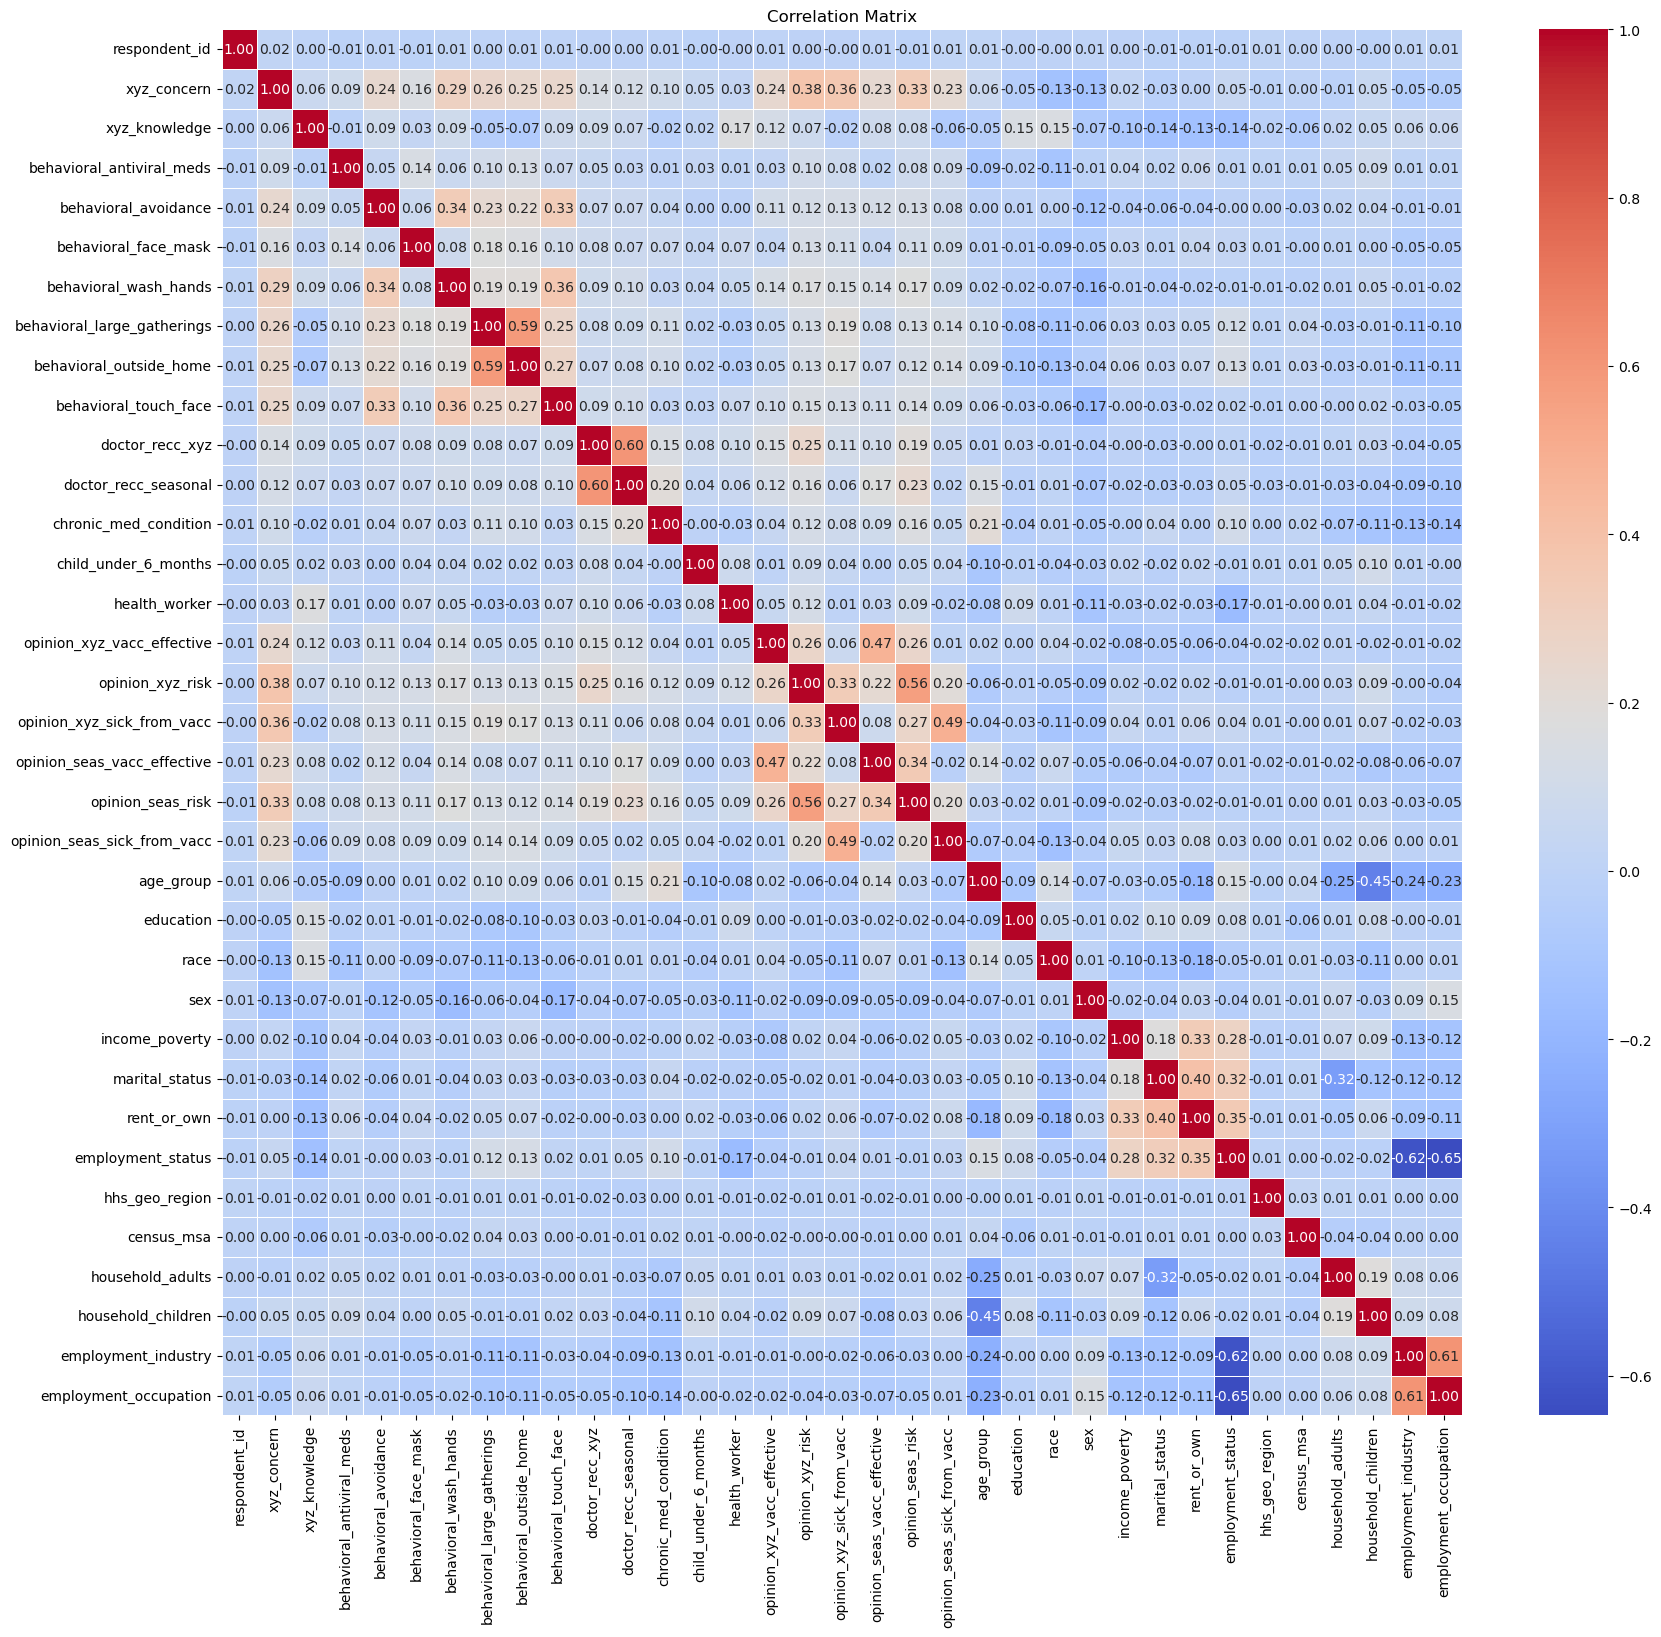

In [426]:
correlation_matrix = df_encoded.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [427]:
X = df_encoded
cleaned_respondent_ids = df_encoded['respondent_id']
labels_cleaned = train_labels[train_labels['respondent_id'].isin(cleaned_respondent_ids)]

In [428]:
y1 = labels_cleaned['xyz_vaccine']
y2= labels_cleaned['seasonal_vaccine']

In [429]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)

In [430]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [431]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', probability = True, random_state=42)

In [432]:
svm_classifier.fit(X_train1, y_train1)
probs1 = svm_classifier.predict_proba(X_test1)[:,1]

In [433]:
probs1

array([0.75446024, 0.0357328 , 0.45654416, ..., 0.05462283, 0.00831214,
       0.82459559])

In [434]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score


fpr, tpr, _ = roc_curve(y_test1, probs1)
roc_auc = auc(fpr, tpr)
auc_score = roc_auc_score(y_test1, probs1)
print(f"AUC Score: {auc_score:.2f}")


AUC Score: 0.83


In [174]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)
svm_classifier.fit(X_train2, y_train2)
probs2 = svm_classifier.predict_proba(X_test2)[:,1]

fpr, tpr, _ = roc_curve(y_test2, probs2)
roc_auc = auc(fpr, tpr)
auc_score = roc_auc_score(y_test2, probs2)
print(f"AUC Score: {auc_score:.2f}")


AUC Score: 0.86


In [48]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()

naive_bayes.fit(X_train1, y_train1)
y_pred1 = naive_bayes.predict(X_test1)
accuracy = accuracy_score(y_test1, y_pred1)
print(f"\nAccuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test1, y_pred1))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test1, y_pred1))


Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3900
           1       1.00      1.00      1.00      1063

    accuracy                           1.00      4963
   macro avg       1.00      1.00      1.00      4963
weighted avg       1.00      1.00      1.00      4963


Confusion Matrix:
[[3900    0]
 [   0 1063]]


In [49]:
naive_bayes.fit(X_train2, y_train2)
y_pred2 = naive_bayes.predict(X_test2)
accuracy = accuracy_score(y_test2, y_pred2)
print(f"\nAccuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test2, y_pred2))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test2, y_pred2))


Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      2710
           1       0.75      0.75      0.75      2253

    accuracy                           0.77      4963
   macro avg       0.77      0.77      0.77      4963
weighted avg       0.77      0.77      0.77      4963


Confusion Matrix:
[[2146  564]
 [ 557 1696]]


In [435]:
#Fitting Test features to the model.
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   xyz_concern                  26623 non-null  float64
 2   xyz_knowledge                26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_xyz              24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [436]:
test_features=test_features.drop(columns=['health_insurance'])

In [437]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   xyz_concern                  26623 non-null  float64
 2   xyz_knowledge                26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_xyz              24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [438]:
test_features['health_worker'].value_counts()

health_worker
0.0    23029
1.0     2890
Name: count, dtype: int64

In [439]:
test_features['employment_industry'].fillna('Unknown', inplace=True)
test_features['employment_occupation'].fillna('Unknown', inplace=True)

In [440]:
median_fill_columns = ['xyz_concern', 'xyz_knowledge','household_adults','household_children','behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands','behavioral_large_gatherings', 'behavioral_outside_home','chronic_med_condition', 'child_under_6_months','health_worker','behavioral_touch_face']
for col in median_fill_columns:
     test_features[col] = test_features[col].fillna(test_features[col].median())

In [441]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   xyz_concern                  26708 non-null  float64
 2   xyz_knowledge                26708 non-null  float64
 3   behavioral_antiviral_meds    26708 non-null  float64
 4   behavioral_avoidance         26708 non-null  float64
 5   behavioral_face_mask         26708 non-null  float64
 6   behavioral_wash_hands        26708 non-null  float64
 7   behavioral_large_gatherings  26708 non-null  float64
 8   behavioral_outside_home      26708 non-null  float64
 9   behavioral_touch_face        26708 non-null  float64
 10  doctor_recc_xyz              24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        26708 non-null  float64
 13  child_under_6_mo

In [442]:
test_features['doctor_recc_xyz'].isnull().sum()

2160

In [443]:
test_features['doctor_recc_seasonal'].isnull().sum()

2160

In [444]:
test_features['doctor_recc_xyz'] = test_features['doctor_recc_xyz'].fillna(0.0)
test_features['doctor_recc_seasonal'] = test_features['doctor_recc_seasonal'].fillna(0.0)

In [445]:
test_features['rent_or_own'].value_counts()

rent_or_own
Own     18721
Rent     5951
Name: count, dtype: int64

In [446]:
test_features['rent_or_own'] = test_features['rent_or_own'].fillna('Own')

In [447]:
test_features_encoded = test_features.copy()
test_features_encoded[test_features.select_dtypes(include=['object']).columns] = ord_enc.fit_transform(test_features[test_features.select_dtypes(include=['object']).columns].fillna('missing'))

In [448]:
from sklearn.impute import KNNImputer

In [449]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
features_to_impute = ['education','income_poverty']
imputed_values = imputer.fit_transform(test_features_encoded[features_to_impute])
imputed_df = pd.DataFrame(imputed_values, columns=[features_to_impute])
test_features_encoded[features_to_impute] = imputed_df

In [450]:
test_features_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   xyz_concern                  26708 non-null  float64
 2   xyz_knowledge                26708 non-null  float64
 3   behavioral_antiviral_meds    26708 non-null  float64
 4   behavioral_avoidance         26708 non-null  float64
 5   behavioral_face_mask         26708 non-null  float64
 6   behavioral_wash_hands        26708 non-null  float64
 7   behavioral_large_gatherings  26708 non-null  float64
 8   behavioral_outside_home      26708 non-null  float64
 9   behavioral_touch_face        26708 non-null  float64
 10  doctor_recc_xyz              26708 non-null  float64
 11  doctor_recc_seasonal         26708 non-null  float64
 12  chronic_med_condition        26708 non-null  float64
 13  child_under_6_mo

In [451]:
test_features_encoded

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,7.0,0.0,1.0,0.0,2.0,8.0
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,1.0,2.0,3.0,0.0,2.0,21.0
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,5.0,2.0,1.0,0.0,11.0,13.0
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,5.0,0.0,1.0,0.0,0.0,0.0
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,6.0,2.0,0.0,1.0,5.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,3.0,2.0,0.0,3.0,2.0,1.0,1.0,1.0,0.0,0.0
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,2.0,0.0,1.0,0.0,9.0,2.0,1.0,3.0,5.0,19.0
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,1.0,9.0,0.0,1.0,0.0,0.0,0.0
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [452]:
test_features_encoded=test_features_encoded.dropna()

In [453]:
test_features_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26001 entries, 0 to 26707
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26001 non-null  int64  
 1   xyz_concern                  26001 non-null  float64
 2   xyz_knowledge                26001 non-null  float64
 3   behavioral_antiviral_meds    26001 non-null  float64
 4   behavioral_avoidance         26001 non-null  float64
 5   behavioral_face_mask         26001 non-null  float64
 6   behavioral_wash_hands        26001 non-null  float64
 7   behavioral_large_gatherings  26001 non-null  float64
 8   behavioral_outside_home      26001 non-null  float64
 9   behavioral_touch_face        26001 non-null  float64
 10  doctor_recc_xyz              26001 non-null  float64
 11  doctor_recc_seasonal         26001 non-null  float64
 12  chronic_med_condition        26001 non-null  float64
 13  child_under_6_months 

In [454]:
scaler = StandardScaler()
test_features_encoded_scaled = scaler.fit_transform(test_features_encoded)
svm_classifier.fit(X_train1, y_train1)
probs1 = svm_classifier.predict_proba(test_features_encoded_scaled)[:,1]

probs1

array([0.08744017, 0.06782339, 0.34832957, ..., 0.15825765, 0.06000569,
       0.61500101])

In [455]:
scaler = StandardScaler()
test_features_encoded_scaled = scaler.fit_transform(test_features_encoded)
svm_classifier.fit(X_train2, y_train2)
probs2 = svm_classifier.predict_proba(test_features_encoded_scaled)[:,1]

probs2

array([0.24947068, 0.06924101, 0.6841033 , ..., 0.24113524, 0.46475141,
       0.52803026])

In [457]:
submission_df = pd.DataFrame({
    'respondent_id': test_features_encoded['respondent_id'],
    'xyz_vaccine': probs1,
    'seasonal_vaccine': probs2
})

submission_df.to_csv('submission.csv', index=False)

